In [1]:
import os
import sys
import utility
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
os.getcwd()

'C:\\Users\\hisahoo.ISC\\Desktop\\Datascience\\Weekly-DS-meeting\\MLSebastianRaschka'

### read file from local directory

In [3]:
data_dir = "dataset"
os.listdir(os.getcwd()+os.sep+data_dir)

['housing.data.txt', 'iris.data.txt']

In [4]:
df = pd.read_csv(data_dir+os.sep+"iris.data.txt", header=None)

In [5]:
print(df.shape)
df.head()

(150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Read file from sklearn datasets

In [6]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

### what is difference between vstack and hstack???

In [10]:
y_train.shape
y_test.shape

(45,)

In [11]:
X_train_std.shape
X_test_std.shape

(45, 2)

In [12]:
lr1 = LogisticRegression()
lr1.fit(X_train_std, y_train)
lr1

C:\Users\hisahoo.ISC\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hisahoo.ISC\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<b> dueto above warnings defined a new model </b>

In [13]:
lr = LogisticRegression(C=100.0, random_state=1, solver="lbfgs", multi_class="auto")
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

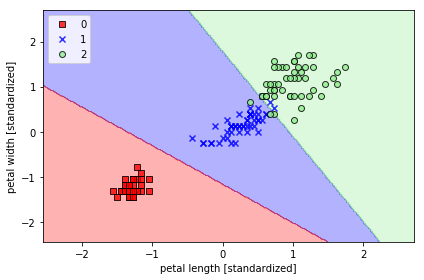

In [14]:
#utility.plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

utility.plot_decision_regions(X_combined_std, y_combined, classifier=lr)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

# why it is different from the book?